<h1 style="font-size:35px"><center>Random Forest Classification with Pokemon Data</center></h1>

This Notebook will be exploring a Pokemon Dataset and will look to build a classification model using the Random Forest algorithm to predict if a specific Pokemon is a Legendary Pokemon or not, in addition the model will be evaluated using a number of metrics.

In [42]:
#Import Libraries
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree, export_text
from subprocess import call
from IPython.display import Image

#Modelling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import confusion_matrix



#Import custom files
%run plot_confusion_matrix.py
%matplotlib inline

<h2>Load Data From CSV File</h2>

In [3]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


<h2>Exploratory Data Analysis</h2>

In [4]:
#Change the name of the '#' column to Pokedex No.
df.rename(columns={'#':'Pokedex No.'}, inplace=True)

In [5]:
df.head()

,Pokedex No.,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
#Calculate how many Null values are in the dataset
df.isnull().sum()

Pokedex No.      0
Name             0
Type 1           0
Type 2         386
Total            0
HP               0
Attack           0
Defense          0
Sp. Atk          0
Sp. Def          0
Speed            0
Generation       0
Legendary        0
dtype: int64

In [7]:
#Calculate the percentage of the missing values in each attribute
df.isnull().sum() / df.count() * 100

Pokedex No.     0.000000
Name            0.000000
Type 1          0.000000
Type 2         93.236715
Total           0.000000
HP              0.000000
Attack          0.000000
Defense         0.000000
Sp. Atk         0.000000
Sp. Def         0.000000
Speed           0.000000
Generation      0.000000
Legendary       0.000000
dtype: float64

In [8]:
#Fill the Null values with 'None'
df['Type 2'] = df['Type 2'].fillna('None')

In [9]:
#Check the null values in the dataset
df.isnull().sum()

Pokedex No.    0
Name           0
Type 1         0
Type 2         0
Total          0
HP             0
Attack         0
Defense        0
Sp. Atk        0
Sp. Def        0
Speed          0
Generation     0
Legendary      0
dtype: int64

In [10]:
#Check columns
df.columns

Index(['Pokedex No.', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [11]:
#Check datatypes
df.dtypes

Pokedex No.     int64
Name           object
Type 1         object
Type 2         object
Total           int64
HP              int64
Attack          int64
Defense         int64
Sp. Atk         int64
Sp. Def         int64
Speed           int64
Generation      int64
Legendary        bool
dtype: object

In [12]:
#Check and show descriptive statistics
df.describe()

,Pokedex No.,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Pokedex No.  800 non-null    int64 
 1   Name         800 non-null    object
 2   Type 1       800 non-null    object
 3   Type 2       800 non-null    object
 4   Total        800 non-null    int64 
 5   HP           800 non-null    int64 
 6   Attack       800 non-null    int64 
 7   Defense      800 non-null    int64 
 8   Sp. Atk      800 non-null    int64 
 9   Sp. Def      800 non-null    int64 
 10  Speed        800 non-null    int64 
 11  Generation   800 non-null    int64 
 12  Legendary    800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


<h2>Data Visualization and Pre-Processing</h2>

In [14]:
#Check the amount of Pokemon for each Class
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

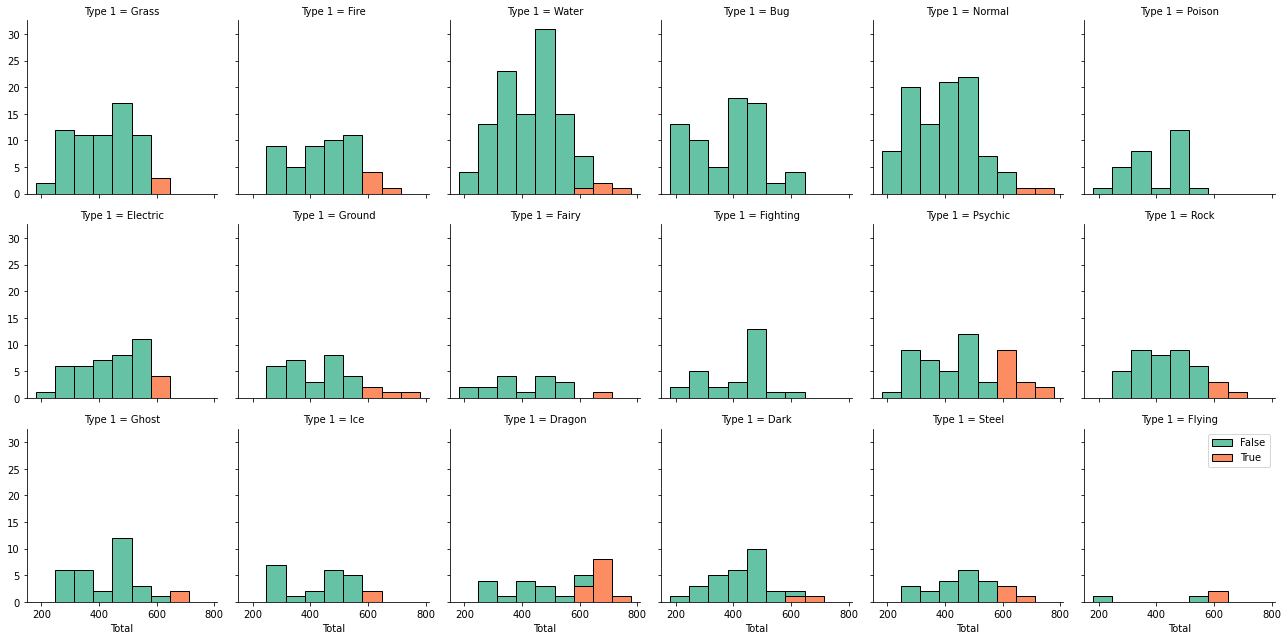

In [15]:
#Creates a multi-plot grid of Histograms to show 
#the relationship between 'Total', 'Type 1' and 'Legendary'
bins = np.linspace(df['Total'].min(), df['Total'].max(), 10)
g = sns.FacetGrid(df, col='Type 1', hue='Legendary', palette="Set2", col_wrap=6)
g.map(plt.hist, 'Total', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

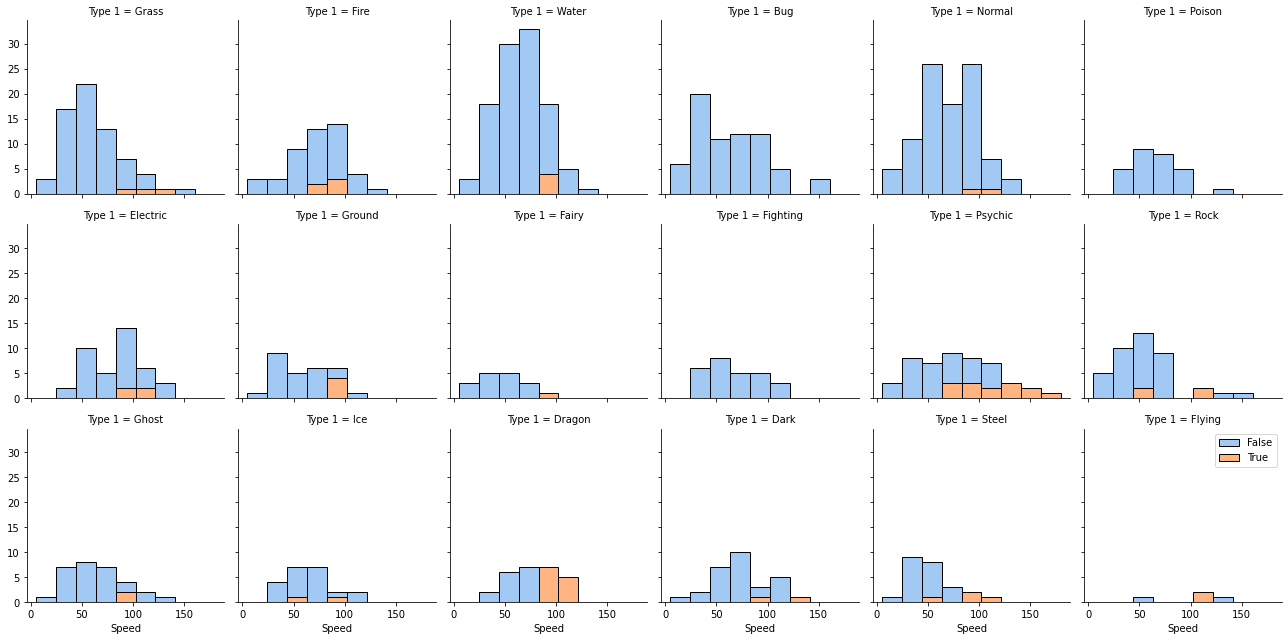

In [16]:
#Split the data into both X and Y variables
#Creates a multi-plot grid of Histograms to show 
#the relationship between 'Speed', 'Type 1' and 'Legendary'
bins = np.linspace(df['Speed'].min(), df['Speed'].max(), 10)
g = sns.FacetGrid(df, col='Type 1', hue='Legendary', palette="pastel", col_wrap=6)
g.map(plt.hist, 'Speed', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

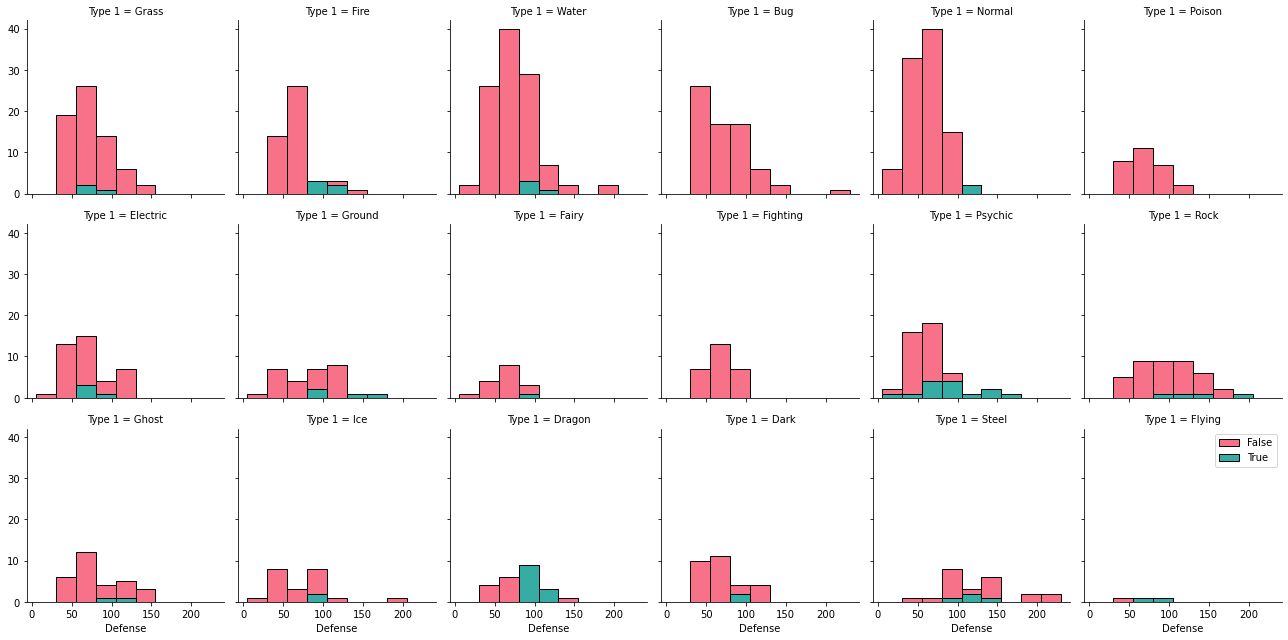

In [17]:
#Creates a multi-plot grid of Histograms to show 
#the relationship between 'Defense', 'Type 1' and 'Legendary'
bins = np.linspace(df['Defense'].min(), df['Defense'].max(), 10)
g = sns.FacetGrid(df, col='Type 1', hue='Legendary', palette="husl", col_wrap=6)
g.map(plt.hist, 'Defense', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

<h2>Modelling</h2>

In [18]:
#Split into X and Y
X = df.drop(columns=['Pokedex No.', 'Name', 'Type 1', 'Type 2', 'Legendary', 'Generation'])
Y = df['Legendary']

In [19]:
#Train Test and Split
X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values)

In [20]:
#Creates Random Forest Classifier Model
#Fits Model to Training data
clf = RF(bootstrap=True)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
#Assess the accuracy of the model using testing data
clf.score(X_test, y_test)

0.95

With a score of 0.95 this suggests that the model can successfully predict if a Pokemon is Legendary or not 95% of the time, this is a very good score for the model.

<h2>Confusion Matrix</h2>

In [22]:
#True Positive - You predicted positive and it's True
#True Negative - You predicted negative and it's True
#False Positive - You predicted positive and it's False
#False Negative - You predicted negative and it's False

y_pred = clf.predict(X_test)
true_negatives, false_positives, false_negatives, true_positives = confusion_matrix(y_test, y_pred).ravel()

print('Sensitivity:', true_positives/(true_positives+false_negatives))
print('Specificity:', true_negatives/(false_positives+true_negatives))

Sensitivity: 0.8666666666666667
Specificity: 0.9567567567567568


In [23]:
print('tn:', true_positives)
print('tn:' , true_negatives)
print('fp:', false_positives)
print('fn:', false_negatives)

tn: 13
tn: 177
fp: 8
fn: 2


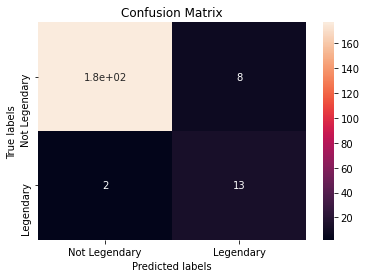

In [24]:
##Plotting the Confusion Matrix
plot_confusion_matrix(y_test, y_pred)

In [25]:
#Cross Validation Score
#Create Random Forest Classifier Model
clf2 = RF(bootstrap=True, max_depth=3)
cross_val_score(clf2, X, Y, cv=10)

array([0.95  , 0.95  , 0.9375, 0.95  , 0.9375, 0.925 , 0.925 , 0.925 ,
       0.925 , 0.95  ])

<h2> Decision Tree Viz</h2>

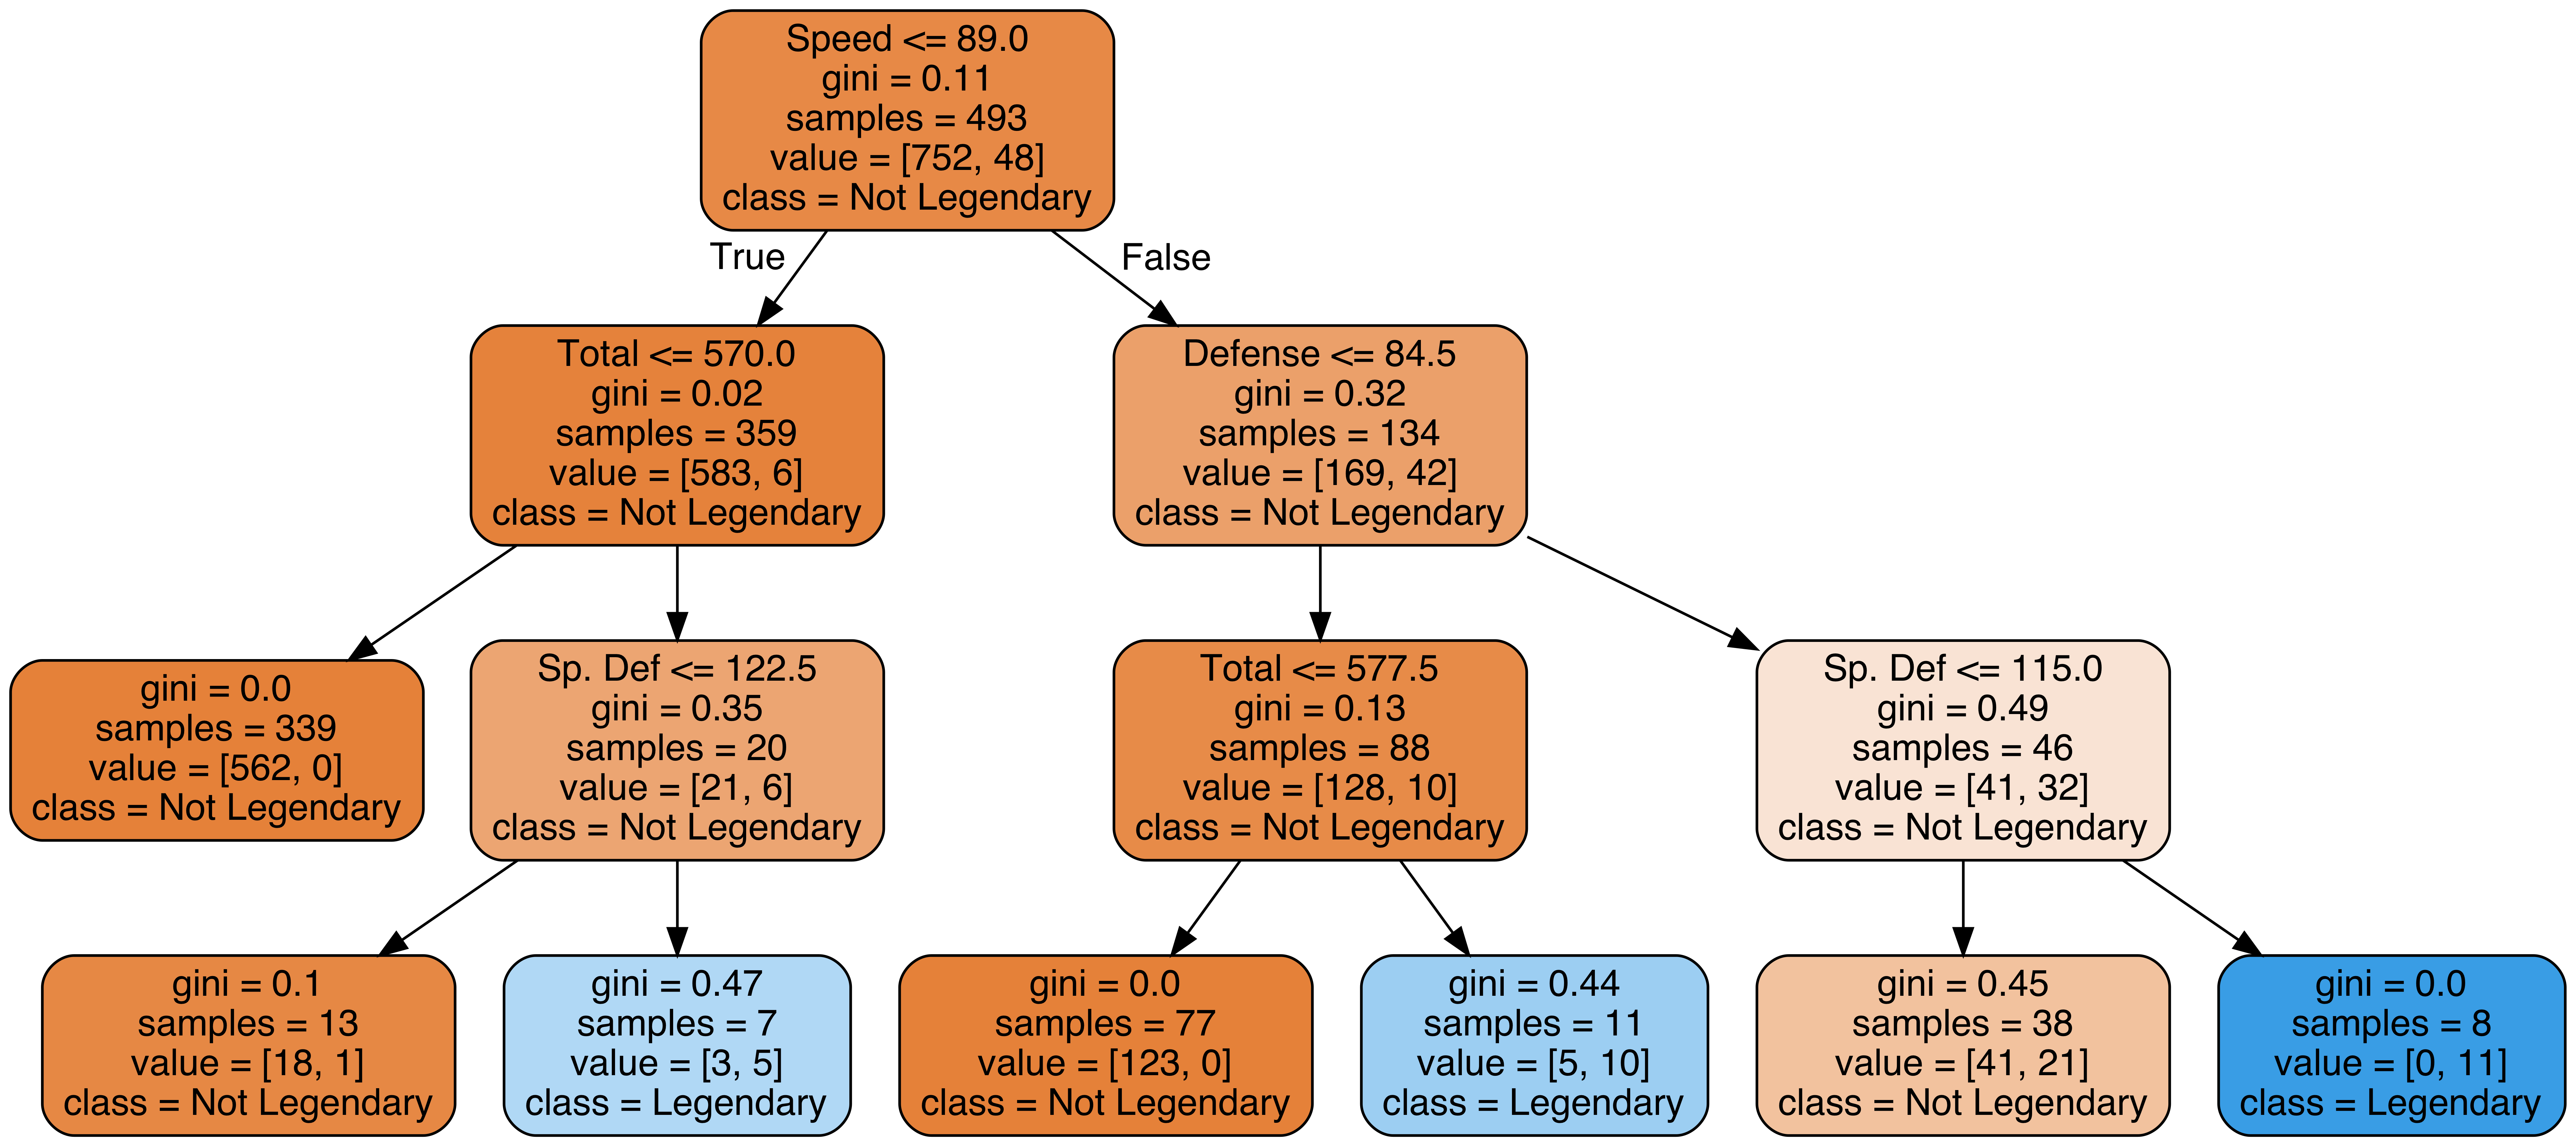

In [46]:
#Examine Single tree in Model
clf2.fit(X,Y)
estimator = clf2.estimators_[-1]
classes = ['Not Legendary', 'Legendary']

#Export Decision tree as a dot file
export_graphviz(estimator, out_file='tree.dot',
               feature_names=X.columns,
               class_names=classes, 
               rounded=True, proportion=False,
               precision=2, filled = True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

Image(filename = 'tree.png')

In [27]:
#Run one single prediction on sample values
clf2.predict(np.array([[1200, 200, 200, 200, 200, 200, 200]]))[0]

True

In [28]:
#Run one single prediction on sample values
clf2.predict(np.array([[240, 40, 40, 40, 40, 40, 40]]))[0]

False

With the score of the mean accuracy of the Random Forest Classification at 0.95 this suggests the model is very good at predicting whether a Pokemon is Legendary or not. A Cross Validation score further supports this with all ten values from the score over 90%.